In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from utils import rating

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
match_df =  pd.read_pickle('../../data/processed/football_results.pkl')

In [6]:
test = match_df.head(50)

seasons and names look reasonable

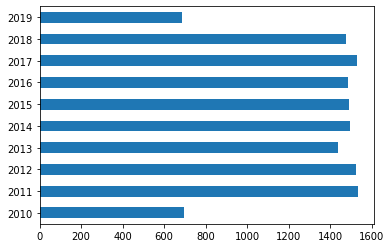

In [7]:
match_df.Date.dt.year.value_counts().sort_index().plot.barh()

In [8]:
match_df = match_df.reset_index(drop=True)

In [9]:
match_df['start_year'] = np.where(match_df.Date.dt.month<6,match_df.Date.dt.year-1,match_df.Date.dt.year)

In [10]:
match_df['count'] = 1

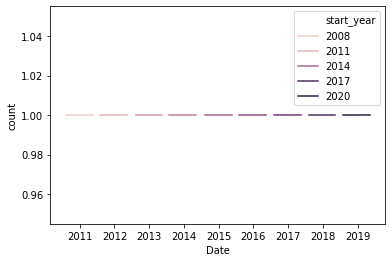

In [11]:
sns.lineplot(data=match_df, x='Date',y='count',hue='start_year')

In [12]:
before_2016 = match_df.loc[match_df.start_year < 2016,:]

In [29]:
match_df.start_year.value_counts() 

2015    1484
2014    1484
2013    1484
2012    1484
2011    1484
2018    1484
2010    1484
2017    1484
2016    1484
Name: start_year, dtype: int64

In [13]:
elo_outcome_16 = rating.ELO(fixtures=before_2016, target='result_val',player_1='HomeTeam',player_2='AwayTeam',rater_name='elo_outcome',hyperparams={'k_factor':10})

In [14]:
_,ratings_16 = elo_outcome_16.process_all_fixtures()

In [31]:
elo_outcome_all =rating.ELO(fixtures=match_df, target='result_val',player_1='HomeTeam',player_2='AwayTeam',rater_name='elo_outcome',hyperparams={'k_factor':10})

In [32]:
matches_with_rating,_ = elo_outcome_all.process_all_fixtures()

In [33]:
matches_with_rating.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH',
       'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD',
       'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD',
       'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD',
       'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY',
       'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSCA',
       'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee', 'SBA', 'SBD', 'SBH', 'SJA',
       'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'result_val',
       'goal_difference', 'expit_goal_difference', 'start_year', 'count',
       'elo_outcome_rating_1', 'elo_outcome_rating_2',
       'elo_outcome_rating_diff', 'elo_outcome_e'],
      dtype='object')

In [34]:
matches_with_rating[['HomeTeam','AwayTeam','Date','FTHG','FTAG', 'elo_outcome_rating_1', 'elo_outcome_rating_2',
       'elo_outcome_rating_diff', 'elo_outcome_e']].to_pickle('../../data/processed/matches_with_rating.pkl')

In [35]:
with open('../../data/processed/ratings.pkl', 'wb') as handle:
    pickle.dump(dict(ratings_16), handle)